<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Natural%20Language%20Processing/Learn_the_Alphabet_with_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Dummy data and utils
Our goal is to have a model that can predict the next letter of the alphabet given the previous letter

In [2]:
alphabets = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# mapping functions
int_to_char = {k:v for k, v in enumerate(alphabets)}
char_to_int = {k:v for v, k in enumerate(alphabets)}

### Utility function for ploting


In [3]:
def plot_util(history):
  loss, acc = history['loss'], history['accuracy']
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  ax[0].plot(loss)
  ax[0].set(title='Loss', xlabel='Epochs')
  ax[1].plot(acc)
  ax[1].set(title='Accuracy', xlabel='Epochs')
  plt.show()

### Utility function for preparing data

In [4]:
def get_data(seq_len=1):
  dataX = []
  dataY= []
  for i in range(0, len(alphabets)- seq_len):
    seq_in = alphabets[i:i+seq_len]
    seq_out = alphabets[i+seq_len]
    dataX.append([char_to_int[i] for i in seq_in])
    dataY.append([char_to_int[i] for i in seq_out])

  return dataX, dataY

### Utility for working with sequences

In [5]:
def get_X_y(seq_len, timesteps, feature_dim):
  X,y = get_data(seq_len)

  # lets add dimensions [ samples , timestep, features]
  X = np.array(X).reshape(len(X), timesteps, feature_dim)
  y = tf.keras.utils.to_categorical(y)

  # normalize the input integers to the range 0-to-1
  X = X/len(alphabets)

  print('Shape of input',X.shape)
  print('Shape of label',y.shape)
  return X, y

### Utility for making prediction

In [6]:
def make_prediction(model, seq_len, timesteps, feature_dim):
  # Making predictions
  data,true_y = get_data(seq_len)
  for seq in data:
    X_ = np.array(seq).reshape(1, timesteps, feature_dim)
    X_ = X_/len(alphabets)
    y_ = model.predict(X_)
    idx = np.argmax(y_)
    print([int_to_char[i] for i in seq],'-->',int_to_char[idx])

### Utility for building model

In [7]:
def build_model(input_shape,lstm_units=32,dense_units=26):
  model = tf.keras.Sequential([
      tf.keras.layers.LSTM(units=lstm_units, input_shape=input_shape),
      tf.keras.layers.Dense(units=dense_units)
  ])

  model.compile(optimizer='adam', 
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy'])

  return model

### Utility for evaluating model

In [8]:
def evaluate_model(model,X,y):
  loss, acc = model.evaluate(X,y,verbose=0)
  print(f'loss :{loss}\naccuracy :{acc}')

## Learning One-Char to One-Char Mapping

In [9]:
X, y = get_X_y(seq_len=1, timesteps=1, feature_dim=1)

Shape of input (25, 1, 1)
Shape of label (25, 26)


In [10]:
# modeling
one_to_one = build_model(input_shape=(X.shape[1],X.shape[2]))
# training
history_one_to_one = one_to_one.fit(X,y,batch_size=1,epochs=500, verbose=0)

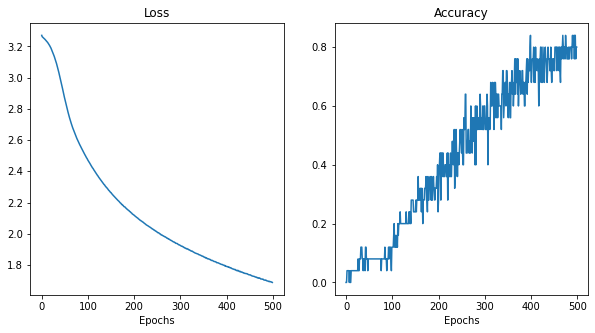

In [11]:
# visualize the learning
plot_util(history_one_to_one.history)

In [12]:
# evaluation
evaluate_model(one_to_one,X,y)

loss :1.6720811128616333
accuracy :0.800000011920929


In [13]:
# making prediction
make_prediction(model=one_to_one, seq_len=1, timesteps=1, feature_dim=1)

['A'] --> B
['B'] --> B
['C'] --> D
['D'] --> E
['E'] --> F
['F'] --> G
['G'] --> H
['H'] --> I
['I'] --> J
['J'] --> K
['K'] --> L
['L'] --> M
['M'] --> N
['N'] --> O
['O'] --> P
['P'] --> Q
['Q'] --> R
['R'] --> S
['S'] --> T
['T'] --> U
['U'] --> W
['V'] --> X
['W'] --> Z
['X'] --> Z
['Y'] --> Z


**Reason for weak performance : poor framing of the problem**<br>
Input shape `[batch, timestep, features]`.<br>
We use a batch size of one, timestep of one event and feature_dimension of one

Here the LSTM units do not have any context to work with. 

Each input-output pattern is shown to the network in a random order and the state of the network is reset after each batch

## Three-Char Feature Window to One-Char Mapping

In [14]:
X, y = get_X_y(seq_len=3, timesteps=1, feature_dim=3)

Shape of input (23, 1, 3)
Shape of label (23, 26)


In [15]:
# modeling
three_char_feature_window = build_model(input_shape=(X.shape[1],X.shape[2]))
# training
three_char_feature_window_history = three_char_feature_window.fit(X, y, epochs=500, batch_size=1, verbose=0)

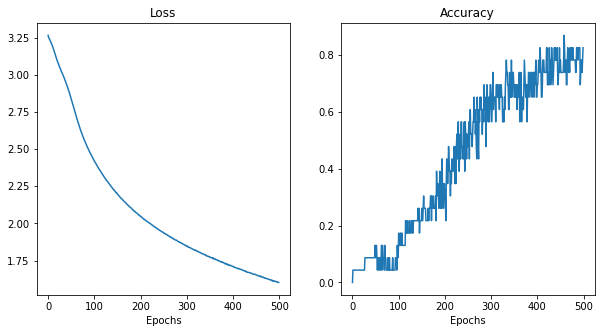

In [16]:
# visualize
plot_util(three_char_feature_window_history.history)

In [17]:
# evalaute the model
evaluate_model(three_char_feature_window, X, y)

loss :1.5860562324523926
accuracy :0.8695651888847351


In [18]:
# make predictions
make_prediction(model=three_char_feature_window, seq_len=3, timesteps=1, feature_dim=3)

['A', 'B', 'C'] --> D
['B', 'C', 'D'] --> E
['C', 'D', 'E'] --> F
['D', 'E', 'F'] --> G
['E', 'F', 'G'] --> H
['F', 'G', 'H'] --> I
['G', 'H', 'I'] --> J
['H', 'I', 'J'] --> K
['I', 'J', 'K'] --> L
['J', 'K', 'L'] --> M
['K', 'L', 'M'] --> N
['L', 'M', 'N'] --> O
['M', 'N', 'O'] --> P
['N', 'O', 'P'] --> Q
['O', 'P', 'Q'] --> R
['P', 'Q', 'R'] --> S
['Q', 'R', 'S'] --> T
['R', 'S', 'T'] --> U
['S', 'T', 'U'] --> V
['T', 'U', 'V'] --> Y
['U', 'V', 'W'] --> Z
['V', 'W', 'X'] --> Z
['W', 'X', 'Y'] --> Z


**Reason for weak performance : poor framing of the problem**<br>
Input shape `[batch, timestep, features]`.<br>
We use a batch size of one, where we have a window of three features (3 characters) but in one timestep

Here the LSTM units have context to work with ,but not more sequence as it expected.

Each input-output pattern is shown to the network in a random order and the state of the network is reset after each batch

**The intended use of LSTMs is to provide context in the form of time steps, rather than windowed features**

We need to reshape the input data as a time step sequence of one feature, rather than a single time step of multiple features.

## Three-Char Time Step Window to One-Char Mapping

In [19]:
# get sequence 
X, y = get_X_y(seq_len=3, timesteps=3, feature_dim=1) 

Shape of input (23, 3, 1)
Shape of label (23, 26)


In [20]:
# modeling
three_char_timestep_window = build_model(input_shape=(X.shape[1],X.shape[2]))
# training
three_char_timestep_window_history = three_char_timestep_window.fit(X, y, epochs=500, batch_size=1, verbose=0)

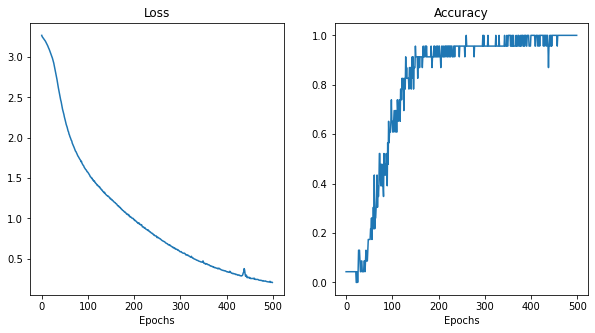

In [22]:
# visualize performance
plot_util(three_char_timestep_window_history.history)

In [21]:
# evaluation
evaluate_model(three_char_timestep_window, X, y)

loss :0.1965232491493225
accuracy :1.0


In [23]:
# prediction
make_prediction(three_char_timestep_window, seq_len=3, timesteps=3, feature_dim=1)

['A', 'B', 'C'] --> D
['B', 'C', 'D'] --> E
['C', 'D', 'E'] --> F
['D', 'E', 'F'] --> G
['E', 'F', 'G'] --> H
['F', 'G', 'H'] --> I
['G', 'H', 'I'] --> J
['H', 'I', 'J'] --> K
['I', 'J', 'K'] --> L
['J', 'K', 'L'] --> M
['K', 'L', 'M'] --> N
['L', 'M', 'N'] --> O
['M', 'N', 'O'] --> P
['N', 'O', 'P'] --> Q
['O', 'P', 'Q'] --> R
['P', 'Q', 'R'] --> S
['Q', 'R', 'S'] --> T
['R', 'S', 'T'] --> U
['S', 'T', 'U'] --> V
['T', 'U', 'V'] --> W
['U', 'V', 'W'] --> X
['V', 'W', 'X'] --> Y
['W', 'X', 'Y'] --> Z


The LSTM networks are stateful. They should be able to learn the whole alphabet sequence, but by default the Keras implementation resets the network state after each training batch.

This suggests that if we had a batch size large enough to hold all input patterns and if all the input patterns were ordered sequentially, that the LSTM could use the context of the sequence within the batch to better learn the sequence.

Additionally, Keras shuffles the training dataset before each training epoch. To ensure the training data patterns remain sequential, we can disable this shuffling.

## Learn from the Batch

In [24]:
X, y = get_X_y(seq_len=3, timesteps=3, feature_dim=1)

Shape of input (23, 3, 1)
Shape of label (23, 26)


In [48]:
# model
learn_from_the_batch = build_model(input_shape=(X.shape[1],X.shape[2]))
# training
learn_from_the_batch_history = learn_from_the_batch.fit(X, y, epochs=1000, batch_size=len(X), shuffle=False, verbose=0)

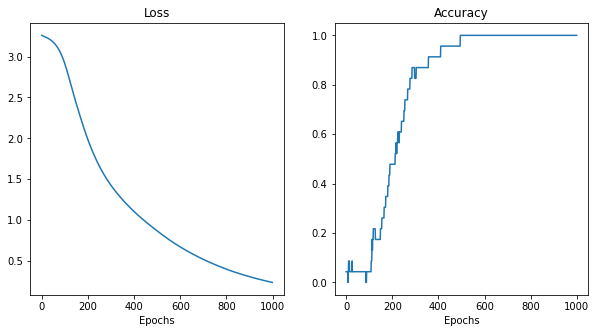

In [49]:
# visualize
plot_util(learn_from_the_batch_history.history)

In [50]:
# evalaute
evaluate_model(learn_from_the_batch, X ,y)

loss :0.2382931113243103
accuracy :1.0


In [51]:
# prediction
make_prediction(learn_from_the_batch, seq_len=3, timesteps=3, feature_dim=1)

['A', 'B', 'C'] --> D
['B', 'C', 'D'] --> E
['C', 'D', 'E'] --> F
['D', 'E', 'F'] --> G
['E', 'F', 'G'] --> H
['F', 'G', 'H'] --> I
['G', 'H', 'I'] --> J
['H', 'I', 'J'] --> K
['I', 'J', 'K'] --> L
['J', 'K', 'L'] --> M
['K', 'L', 'M'] --> N
['L', 'M', 'N'] --> O
['M', 'N', 'O'] --> P
['N', 'O', 'P'] --> Q
['O', 'P', 'Q'] --> R
['P', 'Q', 'R'] --> S
['Q', 'R', 'S'] --> T
['R', 'S', 'T'] --> U
['S', 'T', 'U'] --> V
['T', 'U', 'V'] --> W
['U', 'V', 'W'] --> X
['V', 'W', 'X'] --> Y
['W', 'X', 'Y'] --> Z


In [52]:
# random prediction
X_test, y_test = get_data(seq_len=3)
# pick any at random 
randomX = X_test[10]
# preprocess
randomX = np.array(randomX).reshape(1,3,1)/len(alphabets)
prediction = learn_from_the_batch.predict(randomX)
idx = np.argmax(prediction)

print([int_to_char[i] for i in X_test[10]],'--->',int_to_char[idx])

['K', 'L', 'M'] ---> N


## Variable-Length Input to One-Char mapping

Firstly, we are changing the framing of the problem. To simplify we will define a maximum input sequence length and set it to a small value like 5 to speed up training. This defines the maximum length of subsequences of the alphabet which will be drawn for training.

We also need to define the number of random sequences to create, in this case lets go with 1000. 

In [88]:
# prepare the dataset of input to output pairs encoded as integers

num_samples = 1000
max_len = 5
dataX=[]
dataY=[]
for i in range(num_samples):
  start = np.random.randint(0, len(alphabets)-2)
  stop = np.random.randint(start, min(len(alphabets)-1, start+max_len))
  seq_in = alphabets[start:stop+1]
  seq_out = alphabets[stop+1]
  dataX.append([char_to_int[i] for i in seq_in])
  dataY.append([char_to_int[i] for i in seq_out])

In [89]:
# lets see the variable lenght inputs
for i in range(5):
  print([int_to_char[j] for j in dataX[i]], '--'*10, [int_to_char[j] for j in dataY[i]])

['L', 'M', 'N'] -------------------- ['O']
['T', 'U', 'V', 'W', 'X'] -------------------- ['Y']
['L', 'M'] -------------------- ['N']
['V', 'W'] -------------------- ['X']
['A', 'B'] -------------------- ['C']


In [91]:
# preprocessing

# padding
X = tf.keras.preprocessing.sequence.pad_sequences(dataX, maxlen=max_len, dtype='float32')
# scale
X = X/len(alphabets)

# one hot encoding of targets 
y = tf.keras.utils.to_categorical(dataY)

In [96]:
# reshape the data [ batch , timestep, feature]
X = np.reshape(X, (num_samples, max_len, 1))

In [99]:
# lets build a model
variable_len_seq = build_model(input_shape=(X.shape[1], X.shape[2]))

# training
variable_len_seq_history = variable_len_seq.fit(X, y, epochs=500, batch_size=1, verbose=0)

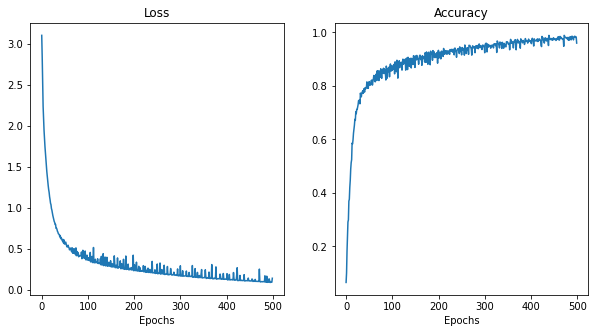

In [100]:
# visualize the performance
plot_util(variable_len_seq_history.history)

In [101]:
# evaluate the model
evaluate_model(variable_len_seq, X, y)

loss :0.3304470479488373
accuracy :0.9369999766349792


In [110]:
# make predictions by generating random test data

for i in range(20):
  index = np.random.randint(0, num_samples)
  test = dataX[index]
  # zero padding
  X_ = tf.keras.preprocessing.sequence.pad_sequences([test], max_len)
  # reshaping
  X_ = np.reshape(X_,(1,max_len,1))
  # prediction
  pred = variable_len_seq.predict(X_)
  idx = np.argmax(idx)
  print([int_to_char[j] for j in test],'--------->',[int_to_char[j] for j in dataY[index]])


['P', 'Q', 'R', 'S', 'T'] ---------> ['U']
['D', 'E', 'F'] ---------> ['G']
['H', 'I', 'J', 'K'] ---------> ['L']
['V', 'W', 'X', 'Y'] ---------> ['Z']
['X'] ---------> ['Y']
['Q'] ---------> ['R']
['E', 'F', 'G'] ---------> ['H']
['J', 'K'] ---------> ['L']
['H', 'I', 'J'] ---------> ['K']
['J'] ---------> ['K']
['B', 'C', 'D', 'E', 'F'] ---------> ['G']
['B'] ---------> ['C']
['H', 'I'] ---------> ['J']
['T'] ---------> ['U']
['U', 'V', 'W'] ---------> ['X']
['M', 'N', 'O'] ---------> ['P']
['F', 'G', 'H', 'I', 'J'] ---------> ['K']
['C'] ---------> ['D']
['C', 'D', 'E'] ---------> ['F']
['D', 'E', 'F'] ---------> ['G']
